In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("news.csv")
data.head( )

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
data.shape

(6335, 4)

In [5]:
labels=data.label
labels.head( )

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
data=data.drop(["title"],axis=1)

In [10]:
data.isnull( ).sum( )

Unnamed: 0    0
text          0
label         0
dtype: int64

In [11]:
data=data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"],axis=1,inplace=True)

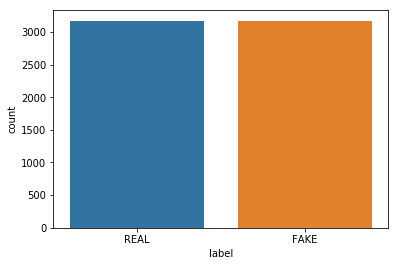

In [13]:
sns.countplot(data=data,x='label',order=data['label'].value_counts( ).index)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.25)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer( )
X_train=vector.fit_transform(X_train)
X_test=vector.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression( )
model.fit(X_train,y_train)
print(accuracy_score(y_train,model.predict(X_train)))
print(accuracy_score(y_test,model.predict(X_test)))


0.9526415491475478
0.9324494949494949


In [37]:
from sklearn.metrics import confusion_matrix
cm=metrics.confusion_matrix(y_test,model.predict(X_test))
print(cm)

[[747  48]
 [ 59 730]]


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
report=metrics.classification_report(y_test,model.predict(X_test))
print(report)

             precision    recall  f1-score   support

       FAKE       0.93      0.94      0.93       795
       REAL       0.94      0.93      0.93       789

avg / total       0.93      0.93      0.93      1584

